### **Overview**

Throughout this assignment, you will be performing specific well-defined tasks that’ll strengthen your concepts in Explainable AI. We will be using the Breast Cancer Dataset and here is a brief context about the same:

Breast cancer is a type of cancer that starts in the breast. Cancer starts when cells begin to grow out of control. Breast cancer cells usually form a tumor that can often be seen on an x-ray or felt as a lump. Breast cancer occurs almost entirely in women, but men can get breast cancer, too.
A benign tumor is a tumor that does not invade its surrounding tissue or spread around the body. A malignant tumor is a tumor that may invade its surrounding tissue or spread around the body.

As part of the assignment, you will have to accomplish the below tasks.

**Author:** Ayoub Berdeddouch

###**Dataset**

Dataset Link: https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv

**About the dataset:**

Different features related to the breast are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe the characteristics of the cell nuclei present in the image.


* id: Id number
* agnosis: Cancer is Malignant or Benign (M = malignant, B = benign) - target variable

Other 20 features contain information about following 10 real valued features

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values) 
* perimeter 
* area 
* smoothness (local variation in radius lengths) 
* compactness (perimeter^2 / area - 1.0) 
* concavity (severity of concave portions of the contour) 
* concave points (number of concave portions of the contour) 
* symmetry  
* fractal dimension ("coastline approximation" - 1)

# Task 1

## Import Necessary Libraries

In [ ]:
pip install shap

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_recall_fscore_support
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer, f1_score

import shap

#ignoring all warnings
import warnings
warnings.filterwarnings('ignore')

# load JS visualization code to notebook. Without this, the SHAP plots won't be displayed
shap.initjs()

## Load the data
Display the first 5 rows of the data after loading.

In [ ]:
url = 'https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv'
data = pd.read_csv(url)
data.reset_index(drop=True)

og_data = pd.read_csv(url)
og_data.reset_index(drop=True)

data.head(5)

In [ ]:
og_data.head()

## Perform Basic Exploratory Data Analysis (EDA)

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
data.corr()

In [ ]:
#Visualize the correlation
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(data.corr(), annot=True, fmt='.0%')

In [ ]:
#Print all of the object data types and their unique values
for column in data.columns:
    if data[column].dtype == object:
        print(str(column) + ' : ' + str(data[column].unique()))
        print(data[column].value_counts())
        print("_________________________________________________________________")

In [ ]:
sns.countplot(data=data,x="diagnosis")

In [ ]:
#Count the empty (NaN, NAN, na) values in each column
data.isna().sum()

In [ ]:
cat_cols = data.select_dtypes(['category']).columns # Storing names of all categorical columns in cat_cols
cat_cols

Index([], dtype='object')

In [ ]:
data[cat_cols] = data[cat_cols].apply(lambda x: x.cat.codes) # Converting the categorical columns into numerical columns
data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,914102,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,0.1713,...,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429,B
1,91858,11.75,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,...,27.98,88.52,552.3,0.1349,0.1854,0.13660,0.10100,0.2478,0.07757,B
2,88466802,10.65,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,...,35.19,77.98,455.7,0.1499,0.1398,0.11250,0.06136,0.3409,0.08147,B
3,9111843,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,...,37.88,85.07,523.7,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194,B
4,84862001,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,...,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420,M


In [ ]:
data["diagnosis"] = data.diagnosis.astype("category").cat.codes


# B == 0 
# M == 1
data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,914102,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,0.1713,...,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429,0
1,91858,11.75,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,...,27.98,88.52,552.3,0.1349,0.1854,0.13660,0.10100,0.2478,0.07757,0
2,88466802,10.65,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,...,35.19,77.98,455.7,0.1499,0.1398,0.11250,0.06136,0.3409,0.08147,0
3,9111843,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,...,37.88,85.07,523.7,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194,0
4,84862001,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,...,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420,1


## Split the data into Train and Test Sets
The train to test ratio should be 80:20 and the random_state should be 0.

In [ ]:
X = data.drop(['diagnosis'], axis = 1)
Y = data['diagnosis']

print(X.shape,Y.shape)

(398, 31) (398,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)
X_train.head()

(278, 31) (120, 31)


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
157,8912909,11.94,20.76,77.87,441.0,0.08605,0.10110,0.06574,0.03791,0.1588,...,13.24,27.29,92.20,546.1,0.1116,0.2813,0.23650,0.11550,0.2465,0.09981
109,854002,19.27,26.47,127.90,1162.0,0.09401,0.17190,0.16570,0.07593,0.1853,...,24.15,30.90,161.40,1813.0,0.1509,0.6590,0.60910,0.17850,0.3672,0.11230
17,892657,10.49,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,...,11.06,24.54,70.76,375.4,0.1413,0.1044,0.08423,0.06528,0.2213,0.07842
253,883270,14.22,27.85,92.55,623.9,0.08223,0.10390,0.11030,0.04408,0.1342,...,15.75,40.54,102.50,764.0,0.1081,0.2426,0.30640,0.08219,0.1890,0.07796
24,912193,12.16,18.03,78.29,455.3,0.09087,0.07838,0.02916,0.01527,0.1464,...,13.34,27.87,88.83,547.4,0.1208,0.2279,0.16200,0.05690,0.2406,0.07729


In [ ]:
X_test.shape

(120, 31)

In [ ]:
X_og = og_data.drop(['diagnosis'], axis = 1)
Y_og = og_data['diagnosis']

X_train_disp, X_test_disp, y_train_disp, y_test_disp = train_test_split(X_og, Y_og, test_size=0.3, random_state=42)
print(X_train_disp.shape, X_test_disp.shape)
X_train_disp.head(3)

(278, 31) (120, 31)


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
157,8912909,11.94,20.76,77.87,441.0,0.08605,0.10110,0.06574,0.03791,0.1588,...,13.24,27.29,92.20,546.1,0.1116,0.2813,0.23650,0.11550,0.2465,0.09981
109,854002,19.27,26.47,127.90,1162.0,0.09401,0.17190,0.16570,0.07593,0.1853,...,24.15,30.90,161.40,1813.0,0.1509,0.6590,0.60910,0.17850,0.3672,0.11230
17,892657,10.49,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,...,11.06,24.54,70.76,375.4,0.1413,0.1044,0.08423,0.06528,0.2213,0.07842


# Task 2

## Use Random Forest Machine Learning Model for prediction

In [ ]:
import xgboost as xgb #importing xgboost model from xgb library
xgc = xgb.XGBClassifier(n_estimators=500, max_depth=5, random_state=42) # Creating a XGB Classifier

In [ ]:
xgc.fit(X_train, y_train) # Training the model with fit method

XGBClassifier(max_depth=5, n_estimators=500, random_state=42)

In [ ]:
predictions = xgc.predict(X_test)
predictions[:10]

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int8)

In [ ]:
accuracy_score(y_test, predictions)

0.9583333333333334

## Evaluate the model using Accuracy Score

In [ ]:
print(classification_report(y_test, predictions, target_names=['B', 'M']))

              precision    recall  f1-score   support

           B       0.96      0.97      0.97        72
           M       0.96      0.94      0.95        48

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120



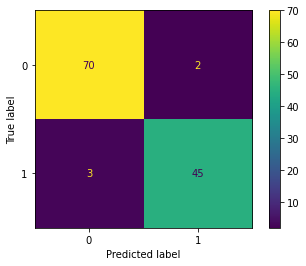

In [ ]:
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# Task 3: Explaining the model with SHAP and Lime.

##  Use a SHAP Explainer to derive SHAP Values for the random forest ml model.

In [ ]:
# creating an explainer for our model
explainer = shap.TreeExplainer(xgc)

# finding out the shap values using the explainer
shap_values = explainer.shap_values(X_test)

# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value)

# displaying the first 5 rows of the shap values table
pd.DataFrame(shap_values).head()

Expected Value: -1.1105161


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-0.808108,0.057473,0.095389,0.252778,0.473307,0.085856,-0.010008,0.056287,1.107989,-0.003863,...,0.289796,0.726980,1.884728,0.568208,-0.227248,-0.149624,0.082258,1.312405,-0.304693,0.0
1,-0.905608,-0.013892,-0.056935,-0.220499,-0.171513,0.114208,-0.025403,-0.039577,-1.083596,-0.003812,...,-0.188422,-0.596202,-1.293824,-0.488026,0.454852,0.151584,-0.086709,-0.571968,-0.215281,0.0
2,-0.850144,0.060860,0.129461,0.239745,-0.116322,-0.003730,-0.010008,0.085231,1.736786,-0.008137,...,0.014052,1.674363,0.319376,0.289893,0.572990,-0.149624,0.185883,1.956325,0.258694,0.0
3,-0.878303,0.061867,0.100705,0.382287,0.469415,0.092028,-0.010008,0.056287,1.077888,0.007279,...,0.297095,0.068917,2.126115,0.654010,0.369449,-0.149624,0.083753,1.009230,0.248764,0.0
4,-0.885851,-0.013892,-0.054286,-0.322203,-0.214001,-0.025832,-0.020738,0.080396,1.147904,-0.038648,...,-0.247386,-1.082587,-1.369520,-0.452484,-0.430497,-0.149624,0.196130,-0.376008,0.188152,0.0


## Write your inferences from the generated plot.

Expected Value: -1.1105161 being displayed above will be used as the base value throughout all the visualizations below. The values above this base value will be put into class 1 (malignant) wheras the values below it will be put into class 0 (benign).

# Task 4

## Plot a SHAP force plot for the first row of test data.

In [ ]:
y_test_disp[0]

'B'

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values[0,:], X_test_disp.iloc[0,:])

## Write your inferences from the generated plot.

Features pushing the prediction higher are shown in red, those 
pushing the prediction lower are in blue.

Base/ Expected Value: -1.1105161

We can see most of the features are displayed in RED i.e. these features contributed in making the Diagnosis as BENIGN.

The final value "5.66" is higher than the base value. Hence, Benign.



# Task 5

## Plot a SHAP force plot for all the rows of the data

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values[:1000,:], X_test.iloc[:1000,:])

## Write your inferences from the generated plot.

# Task 6

## Plot a SHAP summary plot using all the features in the data

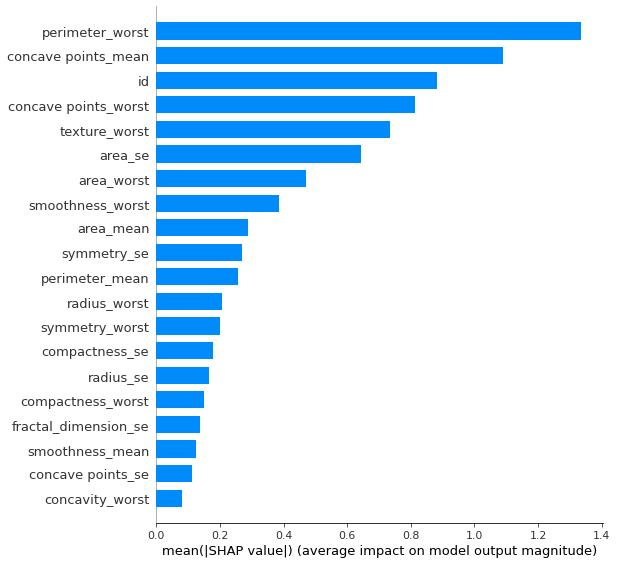

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, 
                  X_test, plot_type="bar")

## Write your inferences from the generated plot.

# Task 7

##Plot a SHAP dependecne plot using all features in the data

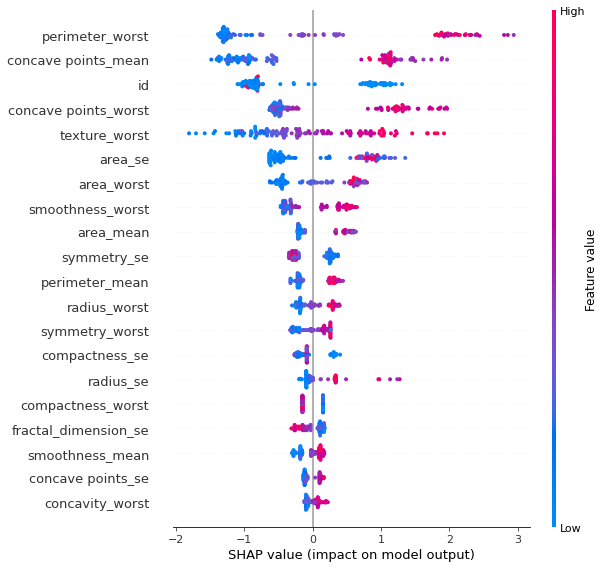

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, X_test)

## Write your inferences from the generated plot.

ValueError: ignored

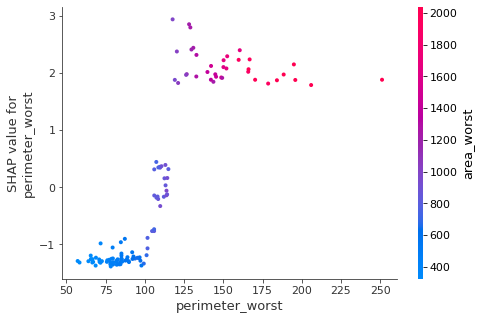

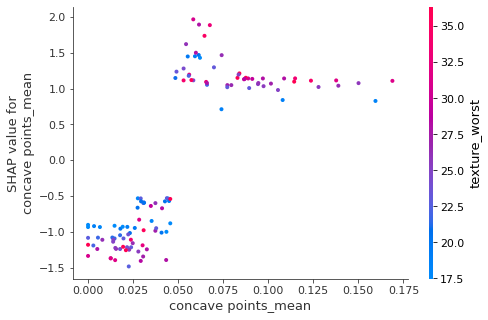

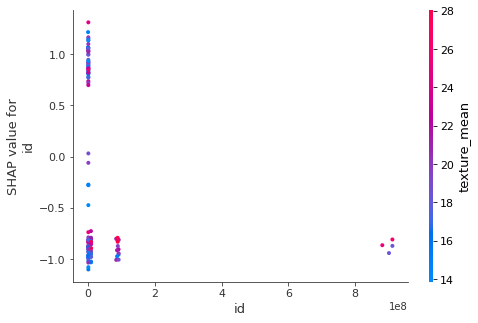

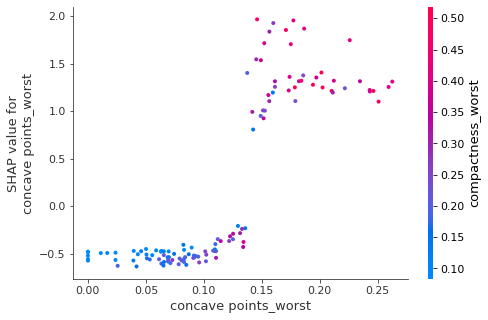

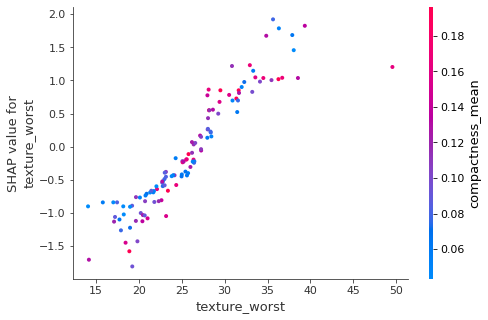

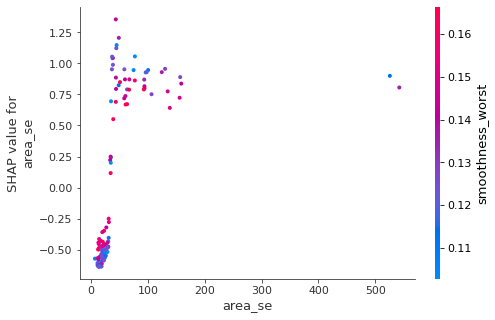

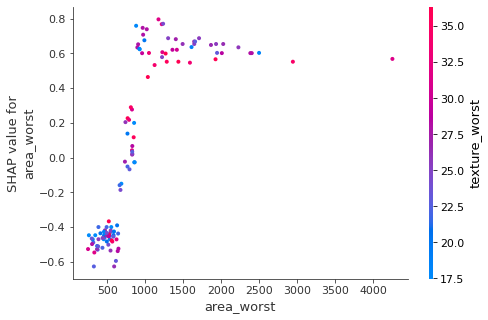

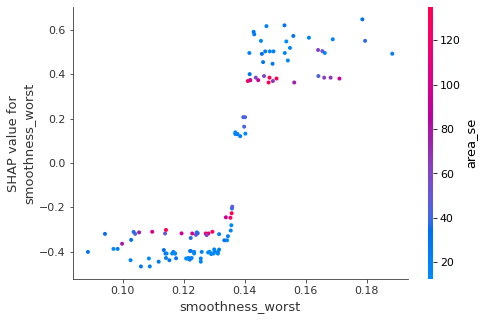

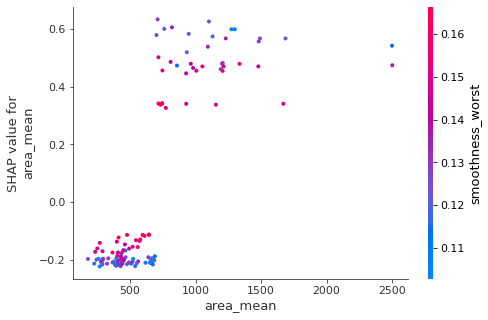

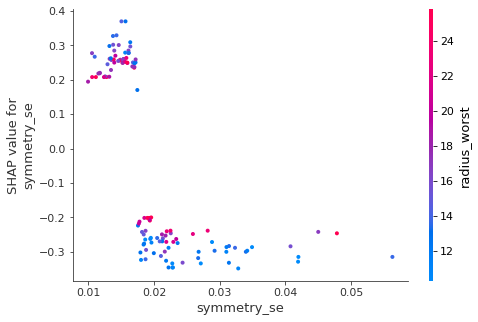

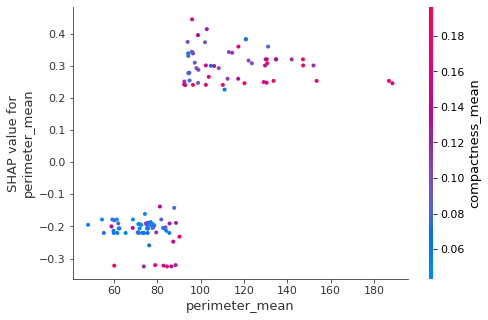

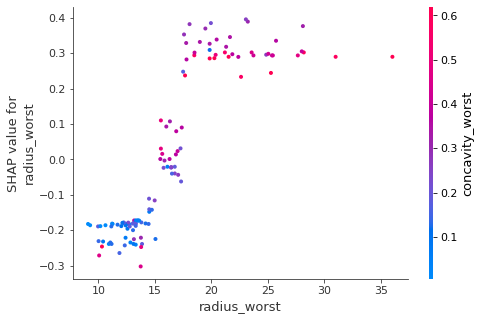

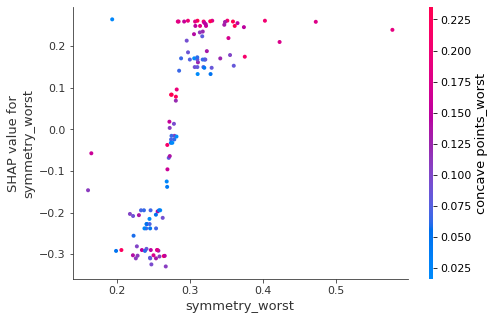

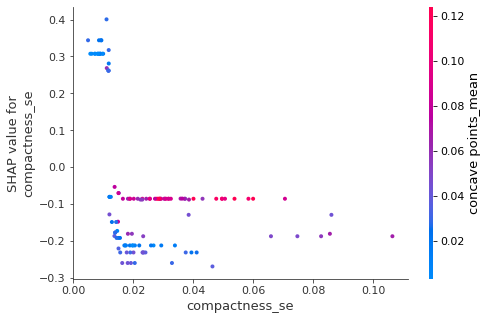

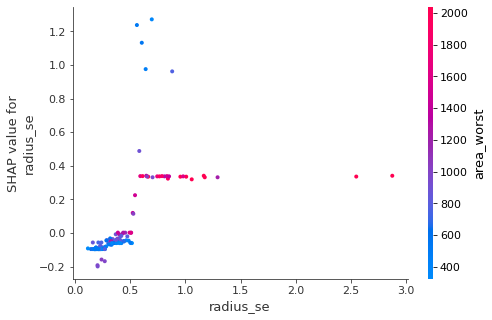

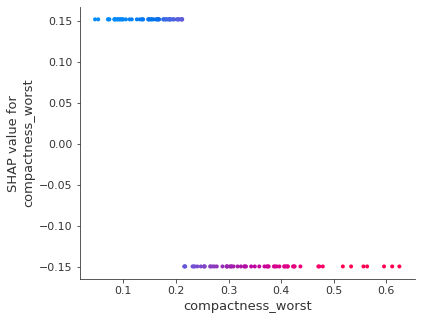

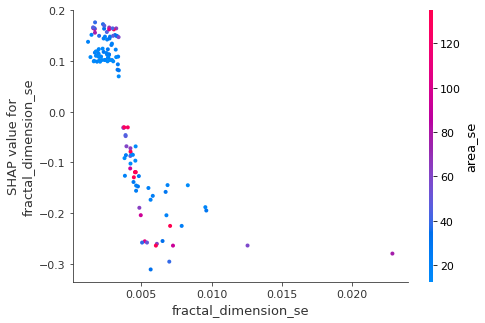

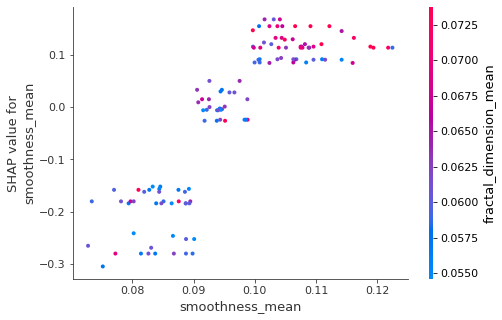

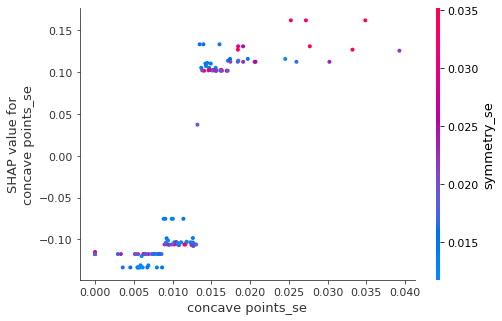

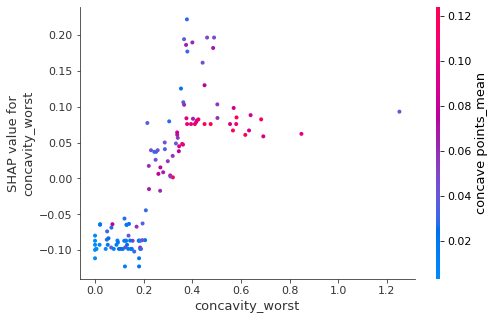

In [ ]:
# sort the features indexes by their importance in the model
# (sum of SHAP value magnitudes over the validation dataset)
top_inds = np.argsort(-np.sum(np.abs(shap_values), 0))

# make SHAP plots of the three most important features
for i in range(20):
    shap.dependence_plot(top_inds[i], shap_values, X_test)